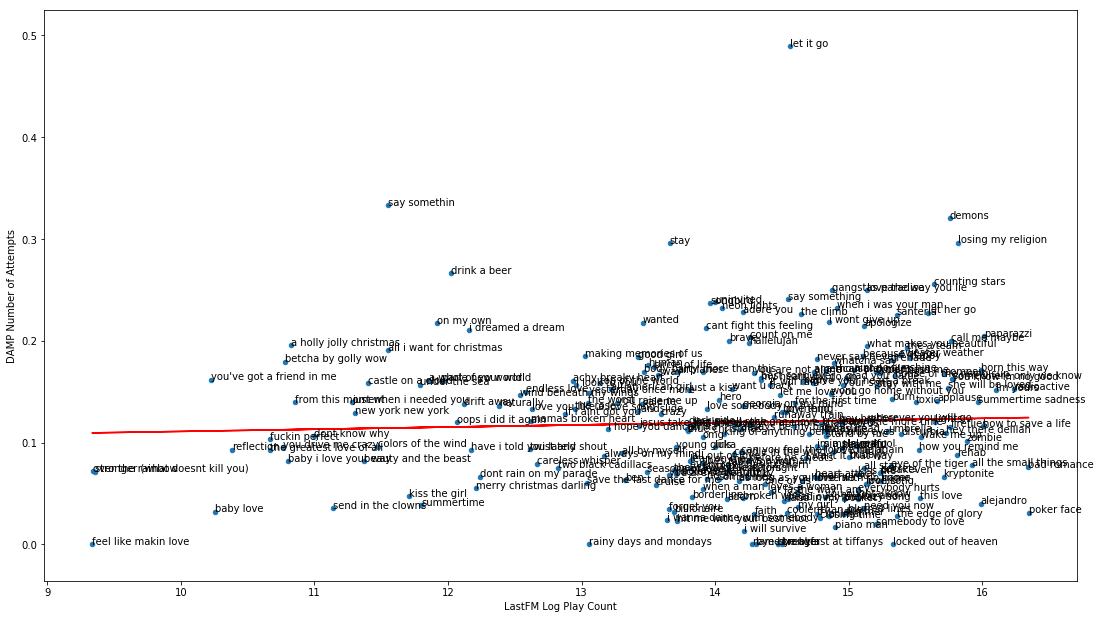

0.044706916467 0.481627218743


In [76]:
import requests
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


class scrapeData(object):
    def __init__(self):
        pass
            
    def getPlaycount(self, track, artist, lastFMkey):
        query="http://ws.audioscrobbler.com/2.0/?method=track.getInfo&api_key=%s&artist=%s&track=%s&format=json" % (lastFMkey,artist.replace(" ","%20"),track.replace(" ","%20"))
#         print query
        response = requests.get(query)
        data = response.json()
        if 'track' in data:
            return data['track']['playcount']

    def parseDampMeta(self, fileIn):
        metaData={}
        userId=[]
        for csv in fileIn:
            data=csv.split("\r")
            for row in data:
                row = row.split(",")
                if len(row) < 6:
                    continue
                track, artist = row[2].replace("_"," ").lstrip().rstrip(), row[7]
                if track in metaData:
                    pass
                else:
                    metaData[track]={'artist': artist, 'singCount': 0, 'playCount':0,'attempts':0}
        with open("/Users/nus/Documents/GitHub/Singability/Data/perfs.csv") as fileIn2:
            fileIn2.next()
            for row in fileIn2:
                row=row.split(",")
                track=row[2].replace("_"," ").lstrip().rstrip()
                if row[6].rstrip() != "EN":
                    continue
                if track == "youve got a friend in me":
                    track="you've got a friend in me"
                elif track == "cruise original":
                    track = "cruise"
                elif track == "can you feel love tngt":
                    track="can you feel the love tonight"
                elif track == "treasure bm":
                    track="treasure"
                elif track == "this little lght of mine":
                    track="this little light of mine"
                elif track == "stay rihanna":
                    track="stay"
                elif track == "lights ellie":
                    track="lights"
                elif track == "save th last dance fr me":
                    track="save the last dance for me"
                elif track == "hit me wth your best sht":
                    track="hit me with your best shot"
                elif track == "crazy patsy":
                    track="crazy"
                elif track == "lucky bs":
                    track="lucky"
                elif track == "strongr what doesnt kill":
                    track="stronger (what doesnt kill you)"
                elif track == "baby bieber":
                    track = "baby"
                elif track == "summertime gershwin":
                    track="summertime"
                elif track == "love you lk a love song":
                    track="love you like a love song"
                elif track == "hero mariah carey":
                    track = "hero"
                elif track == "i wanna dance with smbdy":
                    track = "i wanna dance with somebody"
                elif track == "the way you look tony":
                    track = "the way you look tonight"
                elif track == "say something great big":
                    track = "say something"
                elif track == "newyork newyork":
                    track = "new york new york"
                else:
                    pass
                attempt = str(row[0])+track
                if attempt not in userId:
                    userId.append(attempt)
                else:
                    metaData[track]["attempts"]+=1
                metaData[track]["singCount"]+=1
        return metaData


scrape=scrapeData()
# metaData={}
# lastFMkey="b9e05b386939dbca75c553f6bdceebc1"
# artistData=open("/Users/nus/Documents/GitHub/Singability/Data/perfs20_withAutoExtractedArtistNames.csv","r")
# metaData=scrape.parseDampMeta(artistData)
# for track in metaData:
#     metaData[track]['playCount']=scrape.getPlaycount(track,metaData[track]['artist'],lastFMkey)
#     print track, metaData[track]['artist'],metaData[track]['playCount'],metaData[track]['singCount']

# fOut=open("/Users/nus/Documents/GitHub/Singability/data/popularityScatter_en.tsv","w")
# fOut.write("track\tartist\tlistens\tsings\tattempts\n")
# for track in metaData:
#     plays, sings = metaData[track]['playCount'], metaData[track]['singCount']
#     if plays == 0 or sings == 0 or plays == None or sings == None:
#         continue
#     data=[track,metaData[track]['artist'],metaData[track]['playCount'],metaData[track]['singCount'],metaData[track]['attempts']]
#     fOut.write("\t".join(map(str,data))+"\n")
# fOut.close()


xDat,yDat,nDat=[],[],[]
with open("/Users/nus/Documents/GitHub/Singability/data/popularityScatter_en.tsv","r") as plotData:
    for data in plotData:
        data=data.split("\r")
        for line in data:
            line=line.split("\t")
            if line[2] == "listens":
                continue
            x,y,n=float(line[2]),float(line[4]),line[0]
            xDat.append(np.log(x))
            yDat.append(y/float(line[3]))
#             yDat.append(np.log(y))
            nDat.append(n)

fit= np.polyfit(xDat,yDat, deg=1)
fit_fn = np.poly1d(fit)
plt.scatter(xDat,yDat,s=20)
plt.plot(xDat, fit_fn(xDat),color="red")
plt.xlabel("LastFM Log Play Count")
plt.ylabel("DAMP Number of Attempts")
# plt.ylabel("DAMP Log Number of Renditions")
for nDat, x, y in zip(nDat, xDat, yDat):
    plt.annotate(nDat, xy=(x, y))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()
# plt.savefig("/Users/nus/Documents/GitHub/Singability/data/images/scatterAttempts.png")
# plt.close()

slope, intercept, r_value, p_value, std_err = stats.linregress(xDat,yDat)
print r_value, p_value



In [66]:
users={}
with open("/Users/nus/Documents/GitHub/Singability/Data/perfs.csv") as fileIn2:
    fileIn2.next()
    for row in fileIn2:
        row=row.split(",")
        user=row[0]
        if user not in users:
            users[user]=1
        else:
            users[user]+=1

for u in users: 
    if users[u] != 10:
        print "yes"